Scanning L = 1.0 m
Scanning L = 2.0 m
Scanning L = 3.0 m
Scanning L = 4.0 m
Scanning L = 5.0 m


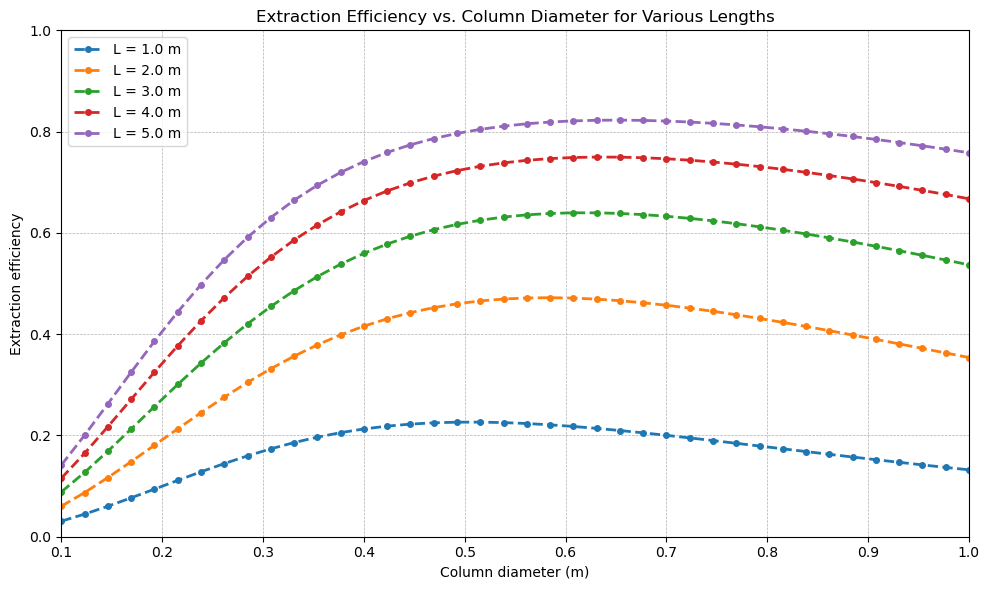

{1.0: array([0.03072713, 0.04471383, 0.06024637, 0.07682952, 0.09398446,
       0.11125507, 0.12821431, 0.14447217, 0.15968627, 0.17357462,
       0.18592681, 0.19660964, 0.2055647 , 0.21279919, 0.21837261,
       0.2223824 , 0.22495062, 0.22621283, 0.22630956, 0.22538009,
       0.22355832, 0.22097007, 0.21773166, 0.21394922, 0.20971857,
       0.20512546, 0.20024611, 0.19514775, 0.18988935, 0.1845223 ,
       0.17909112, 0.17363413, 0.16818409, 0.16276879, 0.15741161,
       0.15213203, 0.14694609, 0.14186679, 0.13690453, 0.13206737]), 2.0: array([0.06027958, 0.08724365, 0.1169256 , 0.14836666, 0.18069162,
       0.21311908, 0.24496766, 0.27565904, 0.30471857, 0.33177355,
       0.35654928, 0.37886297, 0.39861574, 0.41578271, 0.4304015 ,
       0.44255959, 0.45238151, 0.4600167 , 0.46562898, 0.46938799,
       0.47146278, 0.47201722, 0.47120717, 0.46917881, 0.46606789,
       0.46199965, 0.45708904, 0.45144131, 0.44515254, 0.43831041,
       0.43099476, 0.42327834, 0.41522727, 0.4069

In [ ]:
"""
Parametric scanner for the Bubble Column Gas-Liquid Contactor Model.

This script runs the bubble column simulation over a range of column
diameters and lengths to study their effect on extraction efficiency.
"""

import numpy as np
import matplotlib.pyplot as plt
import bubble_col_glc


def run_scan(diameters, lengths, base_params):
    """
    Runs the simulation across a grid of diameters and lengths.

    Args:
        diameters (np.array): Array of column diameters to scan.
        lengths (list): List of column lengths to scan.
        base_params (dict): Dictionary of fixed parameters for the simulation.

    Returns:
        dict: A dictionary where keys are lengths and values are numpy arrays
              of extraction efficiencies corresponding to the diameters.
    """
    scan_results = {}
    for L in lengths:
        efficiencies = []
        print(f"Scanning L = {L} m")
        for D in diameters:
            params = base_params.copy()
            params.update({"L": L, "D": D})
            try:
                # The solve function now returns a single dictionary
                [results, solution] = bubble_col_glc.solve(params)
                eff = results.get("extraction_efficiency [fraction]")
            except Exception as e:
                print(f"  solve failed for D={D:.3f} L={L:.2f}: {e}")
                eff = np.nan
            efficiencies.append(eff)
        scan_results[L] = np.array(efficiencies)
    return scan_results


def plot_results(diameters, scan_results, out_file="extraction_vs_diameter.png"):
    """Plots the results of the parametric scan."""
    plt.figure(figsize=(10, 6))
    for L, efficiencies in scan_results.items():
        plt.plot(diameters, efficiencies, label=f"L = {L} m", lw=2, marker='o', markersize=4, linestyle='--')
    plt.xlabel("Column diameter (m)")
    plt.ylabel("Extraction efficiency")
    plt.title("Extraction Efficiency vs. Column Diameter for Various Lengths")
    plt.ylim(0, 1)
    plt.xlim(diameters.min(), diameters.max())
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.legend()
    plt.tight_layout()

    plt.show()


# Base parameters (modify as required)
base_params = {
    "c_T_inlet": 1.96e-2,   # mol/m^3
    "y_T2_in": 0.0,
    "P_0": 5e5,
    "BCs": "O-C",           # Boundary conditions: "O-C" or "C-C"
    "Flow_l": 560,         # kg/s
    "Flow_g": 10,        # mol/s
    "T": 623,
    "elements": 50,        # Number of initial mesh elements for solver
}

# Define the parameter space for the scan
diameters = np.linspace(0.1, 1.0, 40)  # m
lengths = [1.0, 2.0, 3.0, 4.0, 5.0]    # m

scan_results = run_scan(diameters, lengths, base_params)
plot_results(diameters, scan_results)